In [4]:
# Analysis notebook
# How to Build a Contender: Analyzing What Makes Top College Teams of the Last Five Years Elite 
# 2021–2025

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# File paths
folder_path = "../data/raw"
file_names = ["cbb21.csv", "cbb22.csv", "cbb23.csv", "cbb24.csv", "cbb25.csv"]
season_map = {
    "cbb21.csv": 2021,
    "cbb22.csv": 2022,
    "cbb23.csv": 2023,
    "cbb24.csv": 2024,
    "cbb25.csv": 2025
}

In [6]:
# Load and tag each DataFrame with its season
dfs = []
for file in file_names:
    path = os.path.join(folder_path, file)
    df = pd.read_csv(path)
    df["Season"] = season_map[file]
    dfs.append(df)
    
# Combine all years into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [7]:
# Standardize team names (remove special chars, extra whitespace)
combined_df["Team"] = combined_df["Team"].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True).str.strip()

# Convert numeric columns (except for 'Team' and 'CONF')
non_numeric = ["Team", "CONF"]
numeric_cols = [col for col in combined_df.columns if col not in non_numeric]
combined_df[numeric_cols] = combined_df[numeric_cols].apply(pd.to_numeric, errors="coerce")

In [9]:
# Drop rows with missing key metrics (ADJOE, ADJDE, BARTHAG)
clean_df = combined_df.dropna(subset=["ADJOE", "ADJDE", "BARTHAG"])

# Save cleaned data to processed folder
output_path = "data/processed/cleaned_cbb_2021_2025.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
clean_df.to_csv(output_path, index=False)

print(f"✅ Cleaned data saved to: {output_path}")

✅ Cleaned data saved to: data/processed/cleaned_cbb_2021_2025.csv


In [19]:
# Read cleaned csv
df = pd.read_csv("data/processed/cleaned_cbb_2021_2025.csv")

# Flagging elite teams
df["Elite_Team"] = ((df["SEED"] <= 4) | (df["BARTHAG"] >= 0.95)).astype(int)

# NCAA averages vs Illinois trends
features = ["ADJOE", "ADJDE", "EFG_O", "EFG_D", "TOR", "ORB", "DRB"]
ncaa_avg = df.groupby("Season")[features].mean().reset_index()
ncaa_avg["Team"] = "NCAA Average"
illinois_df = df[
    df["Team"].fillna("").str.contains("Illinois", case=False) &
    ~df["Team"].fillna("").str.contains("State|Chicago|Eastern|Western|Southern|Northern", case=False)
]

trend_df = pd.concat([illinois_df[["Season", "Team"] + features], ncaa_avg])

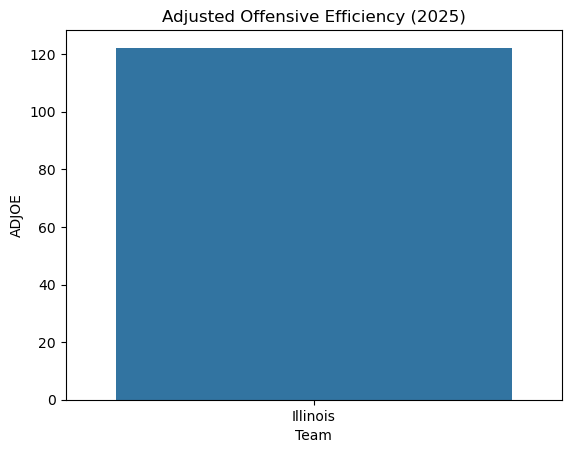

In [24]:
# Single year bar chart
import seaborn as sns
import matplotlib.pyplot as plt

latest = df[df["Season"] == 2025]
subset = latest[latest["Team"].isin(["Illinois", "NCAA Average"])]

sns.barplot(data=subset, x="Team", y="ADJOE")
plt.title("Adjusted Offensive Efficiency (2025)")
plt.ylabel("ADJOE")
plt.show()